In [1]:
import re
import numpy as np
#Data Exploration and cleaning
import warnings 
import seaborn as sns
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
warnings.filterwarnings("ignore")
# Load the dataset
import pandas as pd
from matplotlib import pyplot as plt 
df = pd.read_csv('DataScientist.csv', usecols=lambda column: column not in ['ID'])
df.drop_duplicates(inplace=True)
df

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,3905,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


In [2]:
df.head(20)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
5,5,5,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies\n2.9,"New York, NY","Hartford, CT",201 to 500 employees,1985,Company - Private,Insurance Carriers,Insurance,Unknown / Non-Applicable,"Colony Specialty, Markel, RLI",-1
6,6,6,Quantitative Researcher,$111K-$181K (Glassdoor est.),Experience: Entry-level (PhD Program) or Exper...,4.4,PDT Partners\n4.4,"New York, NY","New York, NY",51 to 200 employees,1993,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
7,7,7,Quantitative Research Associate,$111K-$181K (Glassdoor est.),Seeking a quant to work with senior researcher...,-1.0,Enlightenment Research,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
8,8,8,AI Scientist,$111K-$181K (Glassdoor est.),Paige is a software company helping pathologis...,5.0,Paige\n5.0,"New York, NY","New York, NY",1 to 50 employees,2018,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,True
9,9,9,Quantitative Researcher,$111K-$181K (Glassdoor est.),"About the Position\n\n\nAt Jane Street, we con...",4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

In [4]:
df.drop(columns=['Unnamed: 0', 'Job Description','Industry','Competitors','Easy Apply', 'Revenue'], inplace=True)


In [5]:
df

,index,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Sector
0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel & Tourism
1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,Consumer Services
2,2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1
3,3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Information Technology
4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Business Services
...,...,...,...,...,...,...,...,...,...,...,...
3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,Information Technology
3905,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,Information Technology
3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Business Services
3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting & Legal


In [6]:
df['index'].is_unique


True

In [7]:
df = df.set_index('index')

df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Sector
index,,,,,,,,,,
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel & Tourism
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,Consumer Services
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Information Technology
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Business Services


In [8]:
df.duplicated().sum()


0

In [9]:
df_dummies_no_id = pd.get_dummies(df, drop_first=True)

In [10]:
df_dummies_no_id.shape
df_dummies_no_id.columns.tolist()

['Rating',
 'Founded',
 'Job Title_#105054 (CLS) Clinical Lab Scientist - Microbiology',
 'Job Title_(CLS) Clinical Lab Scientist - Microbiology',
 'Job Title_(Data Analyst) BA/BSA',
 'Job Title_(Data Risk Analyst: Data Modeler)',
 'Job Title_(Project Staff) Consultant, Data Engineer',
 'Job Title_(Risk Data Analyst)',
 'Job Title_(Senior) Data Engineer',
 'Job Title_(Senior) Human Scientist',
 'Job Title_+ Data Engineer',
 'Job Title_+ Data Scientist',
 'Job Title_+ Global Process Data Analyst',
 'Job Title_19-84R Team Lead (Data Analyst IV)',
 'Job Title_20-63 Flood Planning Data Analyst (Data Analyst III)',
 'Job Title_3rd Shift Environmental Monitoring Scientist',
 'Job Title_7232 Data Engineer (Analyst/Programmer - Career), Information Technology DevOps',
 'Job Title_9-1-1 Data Analyst',
 'Job Title_ACA - Data Analyst',
 'Job Title_AI - Natural Language Processing and Machine Learning Engineer',
 'Job Title_AI - Quantitative Research Scientist',
 'Job Title_AI Engineering: Data Sc

In [11]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Sector               0
dtype: int64

In [12]:
df = df.replace({-1: np.nan, "-1": np.nan})

df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Sector
index,,,,,,,,,,
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel & Tourism
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,Consumer Services
2,Data Science Manager,$111K-$181K (Glassdoor est.),NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Information Technology
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Business Services


In [13]:
df.dtypes

Job Title             object
Salary Estimate       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded              float64
Type of ownership     object
Sector                object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3909 entries, 0 to 4379
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          3909 non-null   object 
 1   Salary Estimate    3909 non-null   object 
 2   Rating             3500 non-null   float64
 3   Company Name       3909 non-null   object 
 4   Location           3909 non-null   object 
 5   Headquarters       3669 non-null   object 
 6   Size               3680 non-null   object 
 7   Founded            2932 non-null   float64
 8   Type of ownership  3680 non-null   object 
 9   Sector             3363 non-null   object 
dtypes: float64(2), object(8)
memory usage: 335.9+ KB


In [15]:
df.describe()

,Rating,Founded
count,3500.000000,2932.000000
mean,3.784143,1972.371419
std,0.614619,52.719618
min,1.000000,1625.000000
25%,3.400000,1961.000000
50%,3.800000,1995.000000
75%,4.100000,2006.000000
max,5.000000,2020.000000


In [16]:
df['Job Title'].value_counts()


Job Title
Data Scientist                                                         274
Data Engineer                                                          260
Data Analyst                                                           246
Senior Data Scientist                                                   91
Senior Data Analyst                                                     47
                                                                      ... 
Phoenix Data Science Tutor Jobs                                          1
Civil Engineer/GIS Data Analyst                                          1
Principal Device Modeling Engineer                                       1
SQL/SAS Data Analyst                                                     1
Patient Safety Physician or Safety Scientist - UK, Europe or the US      1
Name: count, Length: 2079, dtype: int64

In [17]:
df['Job Title']=df['Job Title'].apply(lambda x: x.join(x.split(',')[:1]))
df['Job Title']=df['Job Title'].apply(lambda x: x.join(x.split('/')[:1]))
df['Job Title']=df['Job Title'].apply(lambda x: x.join(x.split('-')[:1]))

In [18]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Sector
index,,,,,,,,,,
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel & Tourism
1,Data Scientist,$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,Consumer Services
2,Data Science Manager,$111K-$181K (Glassdoor est.),NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Information Technology
4,Director,$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Business Services
...,...,...,...,...,...,...,...,...,...,...
4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011.0,Company - Private,Information Technology
4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008.0,Company - Private,Information Technology
4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977.0,Company - Private,Business Services


In [19]:
df['Location']=df['Location'].apply(lambda x: x.join(x.split(',')[:1]))
print(df['Location'])

index
0        New York
1        New York
2        New York
3       Lyndhurst
4        New York
          ...    
4375       Dublin
4376     Columbus
4377       Dublin
4378       Dublin
4379       Slough
Name: Location, Length: 3909, dtype: object


In [20]:
# Apply lambda function to extract the first part of the headquarters
df['Headquarters'] = df['Headquarters'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else np.nan)

# Print the result
print(df['Headquarters'])

index
0        Montreal
1        New York
2        New York
3       Lyndhurst
4        New York
          ...    
4375       Irving
4376    Woodridge
4377       Irving
4378        Omaha
4379      Brussel
Name: Headquarters, Length: 3909, dtype: object


In [21]:
print(df['Type of ownership'])



index
0       Company - Private
1       Company - Private
2                 Unknown
3       Company - Private
4       Company - Private
              ...        
4375    Company - Private
4376    Company - Private
4377    Company - Private
4378    Company - Private
4379     Company - Public
Name: Type of ownership, Length: 3909, dtype: object


In [22]:
df['Sector']=df['Sector'].replace(['-1'],np.nan)
print(df['Sector'])

index
0                Travel & Tourism
1               Consumer Services
2                             NaN
3          Information Technology
4               Business Services
                  ...            
4375       Information Technology
4376       Information Technology
4377            Business Services
4378           Accounting & Legal
4379    Biotech & Pharmaceuticals
Name: Sector, Length: 3909, dtype: object


In [23]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Sector
index,,,,,,,,,,
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,New York,Montreal,501 to 1000 employees,2007.0,Company - Private,Travel & Tourism
1,Data Scientist,$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,New York,New York,1001 to 5000 employees,2008.0,Company - Private,Consumer Services
2,Data Science Manager,$111K-$181K (Glassdoor est.),NaN,Decode_M,New York,New York,1 to 50 employees,NaN,Unknown,NaN
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,Lyndhurst,Lyndhurst,201 to 500 employees,2019.0,Company - Private,Information Technology
4,Director,$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,New York,New York,51 to 200 employees,2007.0,Company - Private,Business Services
...,...,...,...,...,...,...,...,...,...,...
4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),4.4,Tachyon Technologies\n4.4,Dublin,Irving,201 to 500 employees,2011.0,Company - Private,Information Technology
4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),5.0,"Staffigo Technical Services, LLC\n5.0",Columbus,Woodridge,51 to 200 employees,2008.0,Company - Private,Information Technology
4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),3.8,"PDS Tech, Inc.\n3.8",Dublin,Irving,5001 to 10000 employees,1977.0,Company - Private,Business Services


In [24]:
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x:x.split()[0])
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x:x.replace('$',''))
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x:x.replace('K',''))
df['Salary Estimate']= df['Salary Estimate'].apply(lambda x:x.replace('(Employer',' '))
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Sector
index,,,,,,,,,,
0,Senior Data Scientist,111-181,3.5,Hopper\n3.5,New York,Montreal,501 to 1000 employees,2007.0,Company - Private,Travel & Tourism
1,Data Scientist,111-181,4.5,Noom US\n4.5,New York,New York,1001 to 5000 employees,2008.0,Company - Private,Consumer Services
2,Data Science Manager,111-181,NaN,Decode_M,New York,New York,1 to 50 employees,NaN,Unknown,NaN
3,Data Analyst,111-181,3.4,Sapphire Digital\n3.4,Lyndhurst,Lyndhurst,201 to 500 employees,2019.0,Company - Private,Information Technology
4,Director,111-181,3.4,United Entertainment Group\n3.4,New York,New York,51 to 200 employees,2007.0,Company - Private,Business Services
...,...,...,...,...,...,...,...,...,...,...
4375,AWS Data Engineer,55-112,4.4,Tachyon Technologies\n4.4,Dublin,Irving,201 to 500 employees,2011.0,Company - Private,Information Technology
4376,Data Analyst â Junior,55-112,5.0,"Staffigo Technical Services, LLC\n5.0",Columbus,Woodridge,51 to 200 employees,2008.0,Company - Private,Information Technology
4377,Security Analytics Data Engineer,55-112,3.8,"PDS Tech, Inc.\n3.8",Dublin,Irving,5001 to 10000 employees,1977.0,Company - Private,Business Services


In [25]:
df['Size'] = df['Size'].replace(-1, np.nan)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('to', '-') if pd.notnull(x) else x)
df['Size'] = df['Size'].apply(lambda x:x.replace('+',' - 0') if pd.notnull(x) else x)
df['Size']= df['Size'].apply(lambda x:x.replace('employees',' ') if pd.notnull(x) else x)

In [26]:
def convert_size_to_num(x):
    if isinstance(x, float):
        return x  # Return float values as they are
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except ValueError:
        return None

df['Salary Estimate'] = df['Salary Estimate'].apply(convert_size_to_num)
df['Size'] = df['Size'].apply(convert_size_to_num)

df

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Sector
index,,,,,,,,,,
0,Senior Data Scientist,146.0,3.5,Hopper\n3.5,New York,Montreal,750.5,2007.0,Company - Private,Travel & Tourism
1,Data Scientist,146.0,4.5,Noom US\n4.5,New York,New York,3000.5,2008.0,Company - Private,Consumer Services
2,Data Science Manager,146.0,NaN,Decode_M,New York,New York,25.5,NaN,Unknown,NaN
3,Data Analyst,146.0,3.4,Sapphire Digital\n3.4,Lyndhurst,Lyndhurst,350.5,2019.0,Company - Private,Information Technology
4,Director,146.0,3.4,United Entertainment Group\n3.4,New York,New York,125.5,2007.0,Company - Private,Business Services
...,...,...,...,...,...,...,...,...,...,...
4375,AWS Data Engineer,83.5,4.4,Tachyon Technologies\n4.4,Dublin,Irving,350.5,2011.0,Company - Private,Information Technology
4376,Data Analyst â Junior,83.5,5.0,"Staffigo Technical Services, LLC\n5.0",Columbus,Woodridge,125.5,2008.0,Company - Private,Information Technology
4377,Security Analytics Data Engineer,83.5,3.8,"PDS Tech, Inc.\n3.8",Dublin,Irving,7500.5,1977.0,Company - Private,Business Services


In [31]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Sector
index,,,,,,,,,,
0,Senior Data Scientist,146.0,3.5,Hopper,New York,Montreal,750.5,2007.0,Company - Private,Travel & Tourism
1,Data Scientist,146.0,4.5,Noom US,New York,New York,3000.5,2008.0,Company - Private,Consumer Services
2,Data Science Manager,146.0,NaN,Decode_M,New York,New York,25.5,NaN,Unknown,NaN
3,Data Analyst,146.0,3.4,Sapphire Digital,Lyndhurst,Lyndhurst,350.5,2019.0,Company - Private,Information Technology
4,Director,146.0,3.4,United Entertainment Group,New York,New York,125.5,2007.0,Company - Private,Business Services
...,...,...,...,...,...,...,...,...,...,...
4375,AWS Data Engineer,83.5,4.4,Tachyon Technologies,Dublin,Irving,350.5,2011.0,Company - Private,Information Technology
4376,Data Analyst â Junior,83.5,5.0,"Staffigo Technical Services, LLC",Columbus,Woodridge,125.5,2008.0,Company - Private,Information Technology
4377,Security Analytics Data Engineer,83.5,3.8,"PDS Tech, Inc.",Dublin,Irving,7500.5,1977.0,Company - Private,Business Services


                                            Company Name  Salary Estimate
index                                                                    
1440                                      Varsity Tutors             18.0
1441                                      Varsity Tutors             18.0
1442                                      Varsity Tutors             18.0
2332                            University Health System             22.0
2333                                                 LMI             22.0
2334                                      U.S. Air Force             22.0
2335                                       Spectrum Comm             22.0
2336                                          BB&E, Inc.             22.0
2337                                CDO Technologies Inc             22.0
2338                                    BioBridge Global             22.0
2339                                    Cherokee Federal             22.0
2340             General Dynamics Info

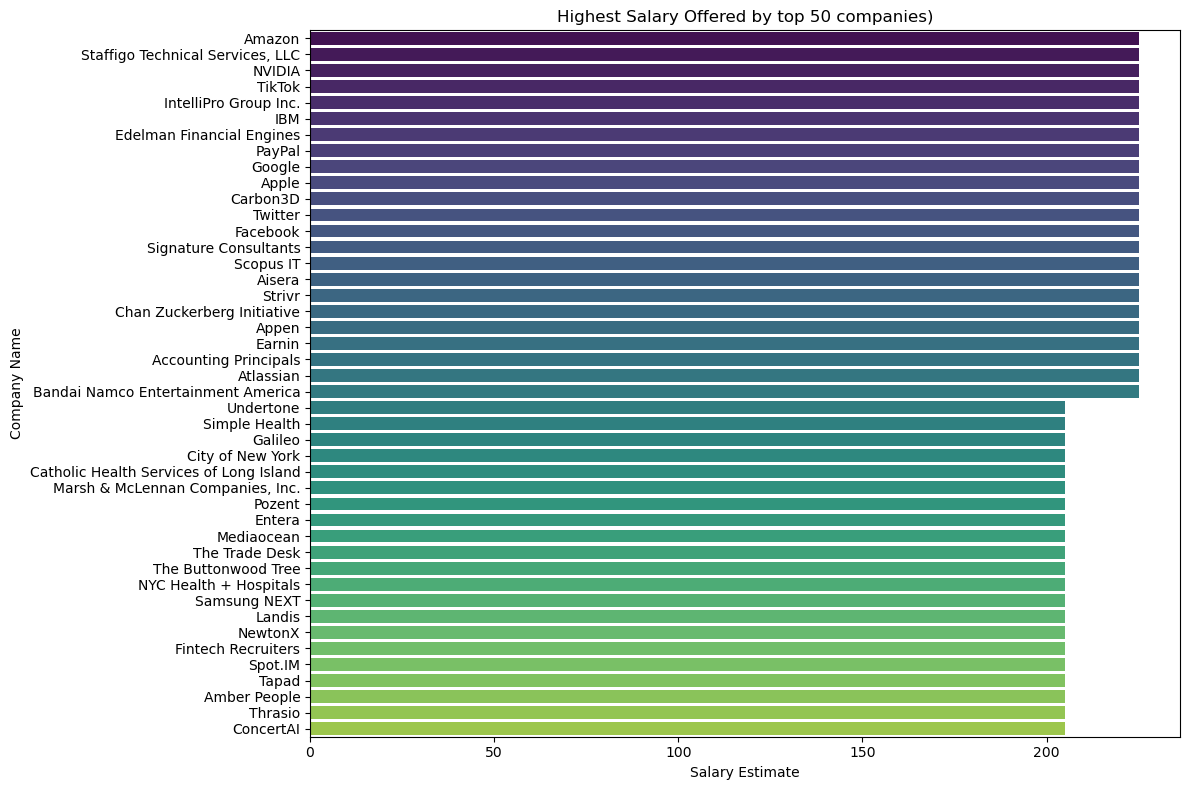

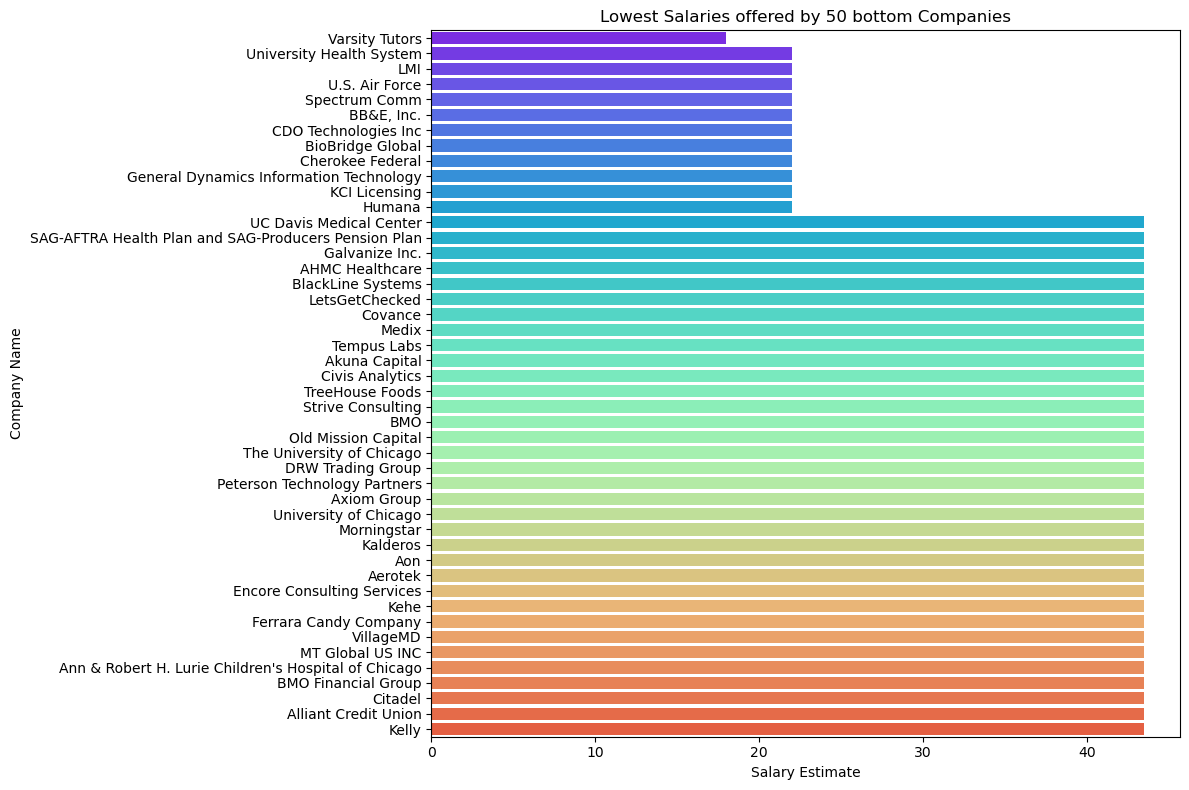

In [41]:
# Sort the DataFrame by 'Salary Estimate' in ascending order and get the top 30 rows
print(df.nsmallest(50, 'Salary Estimate')[['Company Name', 'Salary Estimate']])

# Sort the DataFrame by 'Salary Estimate' in descending order and get the top 30 rows
print(df.nlargest(50, 'Salary Estimate')[['Company Name', 'Salary Estimate']])

# Sort the DataFrame by 'Salary Estimate' in ascending order and get the top 50 rows
bottom_50 = df.nsmallest(50, 'Salary Estimate')[['Company Name', 'Salary Estimate']]

# Sort the DataFrame by 'Salary Estimate' in descending order and get the top 50 rows
top_50 = df.nlargest(50, 'Salary Estimate')[['Company Name', 'Salary Estimate']]


# Define a color palette ("viridis" in this case)
palette_1 = sns.color_palette("viridis", n_colors=50)
palette_2 = sns.color_palette("rainbow", n_colors=50)


# Plotting the top 50 companies by salary estimate
plt.figure(figsize=(12, 8))
sns.barplot(x='Salary Estimate', y='Company Name', data=top_50, palette=palette_1)
plt.xlabel('Salary Estimate')
plt.ylabel('Company Name')
plt.title('Highest Salary Offered by top 50 companies)')
plt.tight_layout()
plt.show()

# Plotting the bottom 50 companies by salary estimate
plt.figure(figsize=(12, 8))
sns.barplot(x='Salary Estimate', y='Company Name', data=bottom_50, palette=palette_2)
plt.xlabel('Salary Estimate')
plt.ylabel('Company Name')
plt.title('Lowest Salaries offered by 50 bottom Companies')
plt.tight_layout()
plt.show()


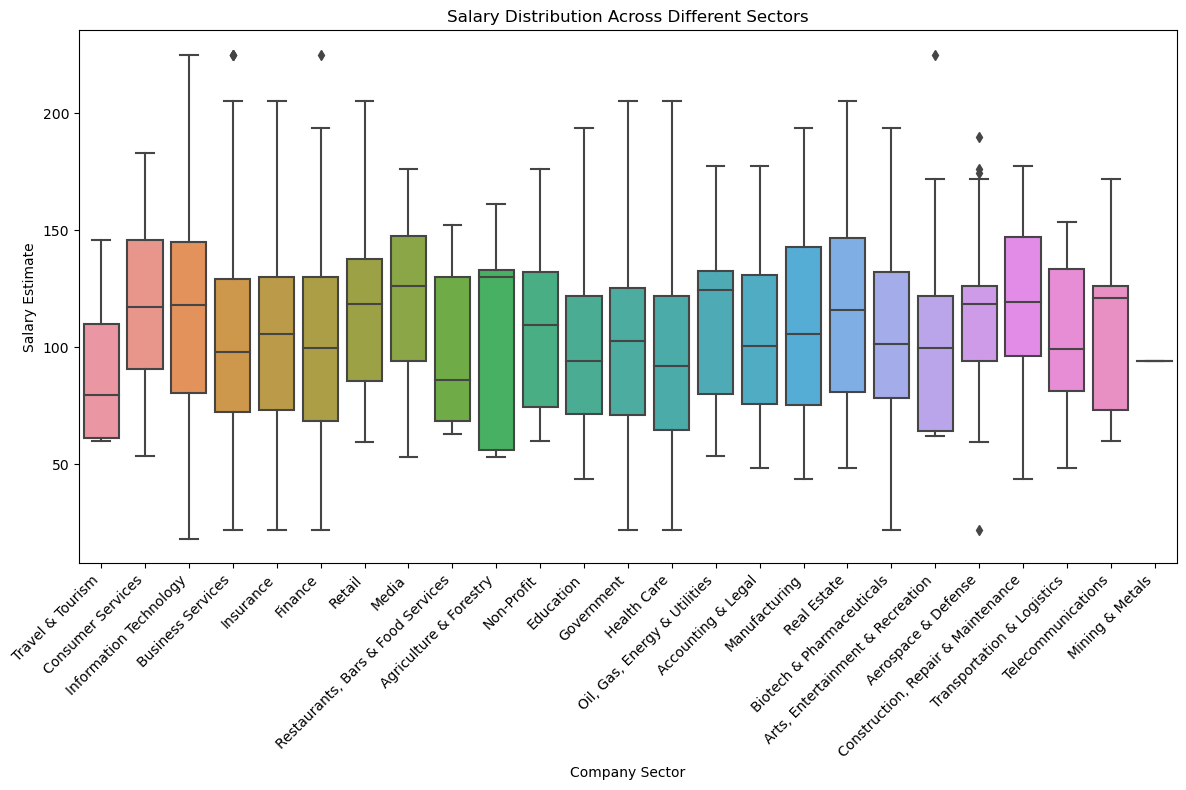

In [42]:
# Create a boxplot to visualize the distribution of salary across different sectors
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sector', y='Salary Estimate', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Company Sector')
plt.ylabel('Salary Estimate')
plt.title('Salary Distribution Across Different Sectors')
plt.tight_layout()
plt.show()

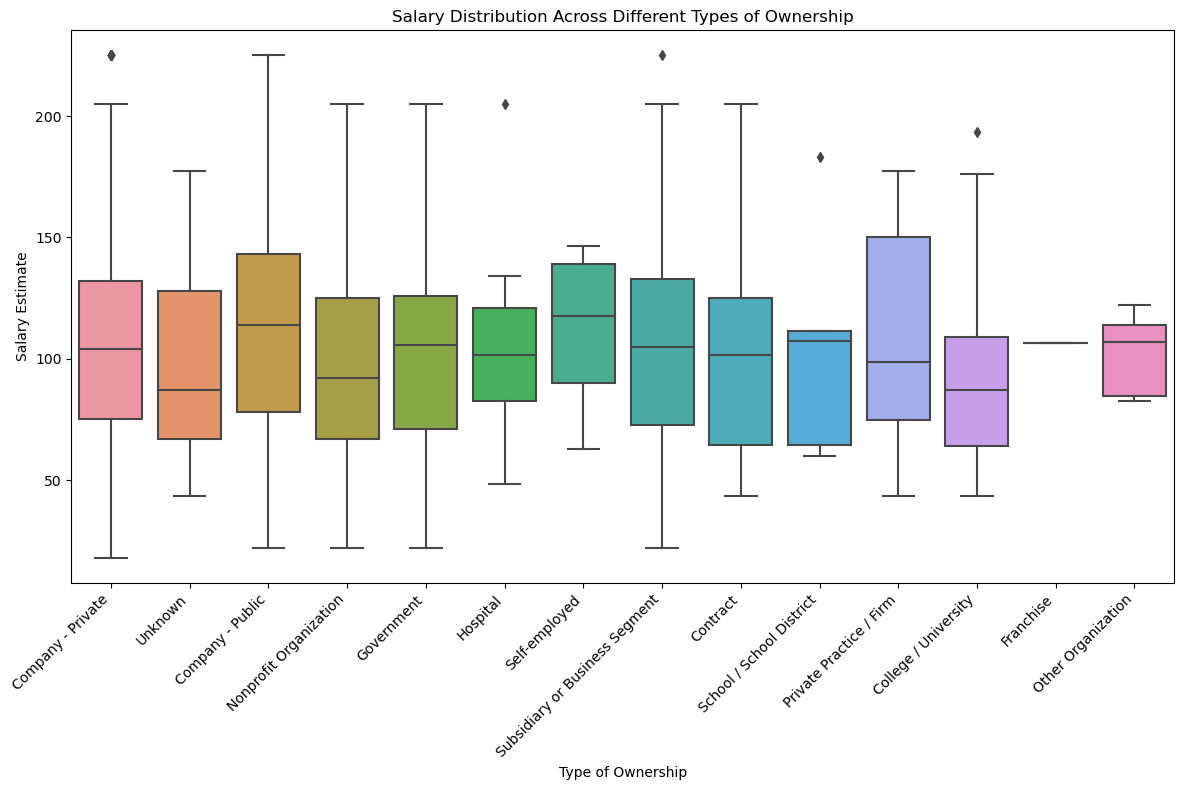

In [43]:
# Create a boxplot to visualize the distribution of salary across different types of ownership
plt.figure(figsize=(12, 8))
sns.boxplot(x='Type of ownership', y='Salary Estimate', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Type of Ownership')
plt.ylabel('Salary Estimate')
plt.title('Salary Distribution Across Different Types of Ownership')
plt.tight_layout()
plt.show()


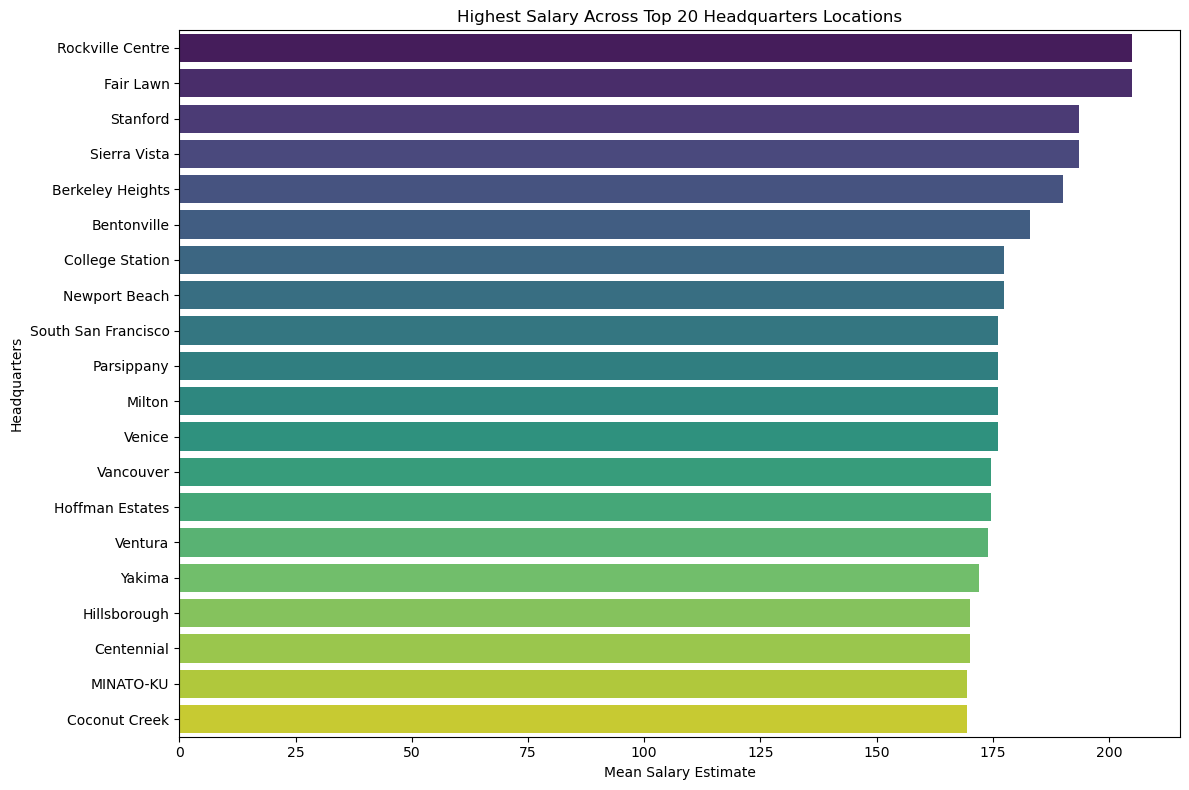

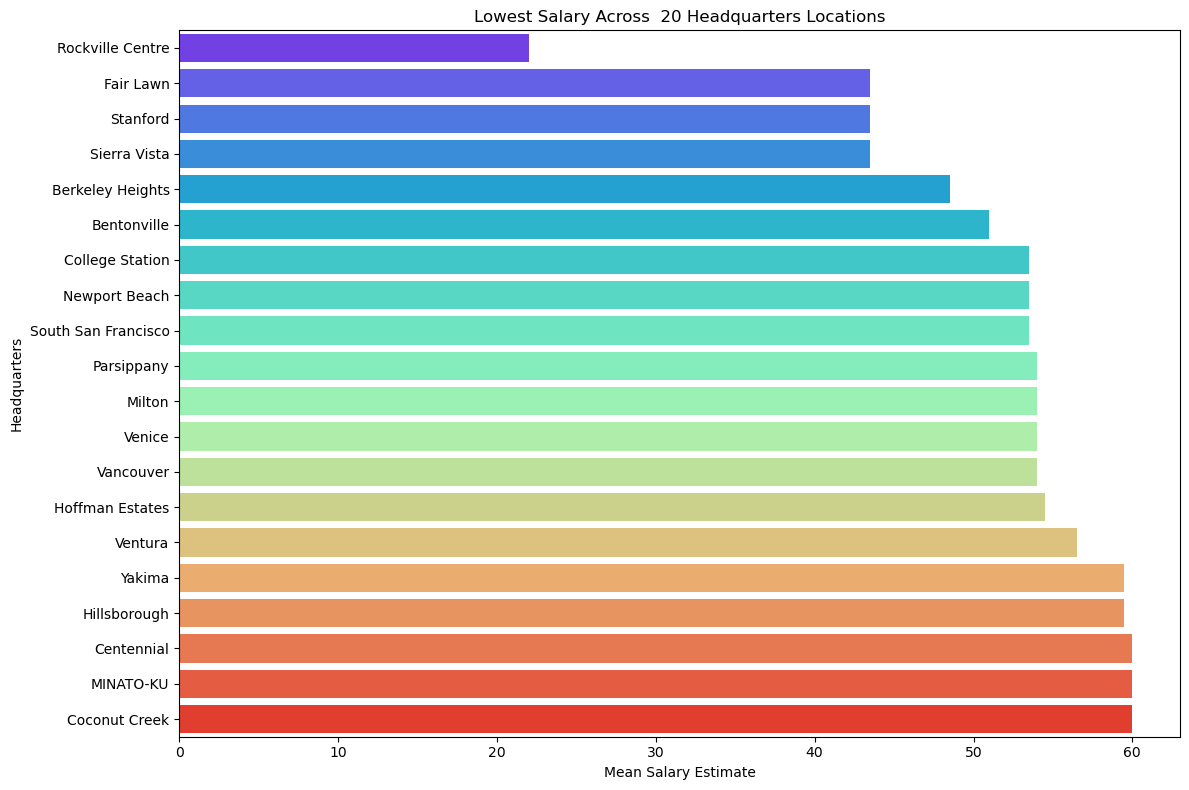

In [44]:
# Get the top 20 headquarters locations by median salary
top_20_headquarters = df.groupby('Headquarters')['Salary Estimate'].mean().sort_values(ascending=False).head(20)

# Create a bar plot to visualize the median salary of the top 20 headquarters locations
plt.figure(figsize=(12, 8))
sns.barplot(y=top_20_headquarters.index, x=top_20_headquarters.values, palette='viridis')
plt.xlabel('Mean Salary Estimate')
plt.ylabel('Headquarters')
plt.title('Highest Salary Across Top 20 Headquarters Locations')
plt.tight_layout()
plt.show()


# Get the bottom 20 headquarters locations by median salary
bottom_20_headquarters = df.groupby('Headquarters')['Salary Estimate'].mean().sort_values(ascending=True).head(20)

# Create a bar plot to visualize the median salary of the Bottom 20 headquarters locations
plt.figure(figsize=(12, 8))
sns.barplot(y=top_20_headquarters.index, x=bottom_20_headquarters.values, palette='rainbow')
plt.xlabel('Mean Salary Estimate')
plt.ylabel('Headquarters')
plt.title('Lowest Salary Across  20 Headquarters Locations')
plt.tight_layout()
plt.show()

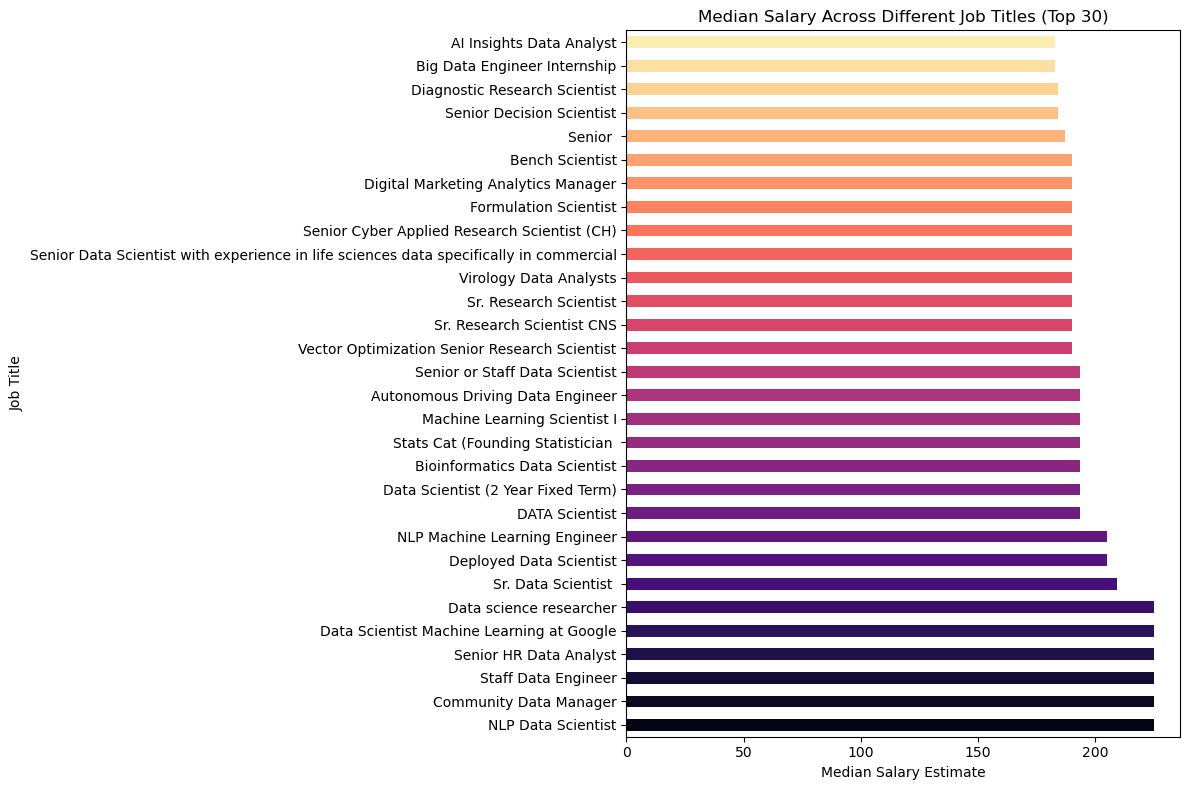

In [51]:
# Get the top 30 job titles based on median salary estimate
top_30_job_titles = df.groupby('Job Title')['Salary Estimate'].median().nlargest(30).index

# Filter the DataFrame for the top 30 job titles
df_top_30 = df[df['Job Title'].isin(top_30_job_titles)]

# Sort the DataFrame by median salary estimate within each job title
df_top_30_sorted = df_top_30.groupby('Job Title')['Salary Estimate'].median().sort_values(ascending=False)

# Define a palette of colors using seaborn (using 'magma' colormap)
custom_palette = sns.color_palette('magma', len(df_top_30_sorted))

# Plot the bar graph with the custom palette
plt.figure(figsize=(12, 8))
df_top_30_sorted.plot(kind='barh', color=custom_palette)
plt.xlabel('Median Salary Estimate')
plt.ylabel('Job Title')
plt.title('Median Salary Across Different Job Titles (Top 30)')
plt.tight_layout()
plt.show()

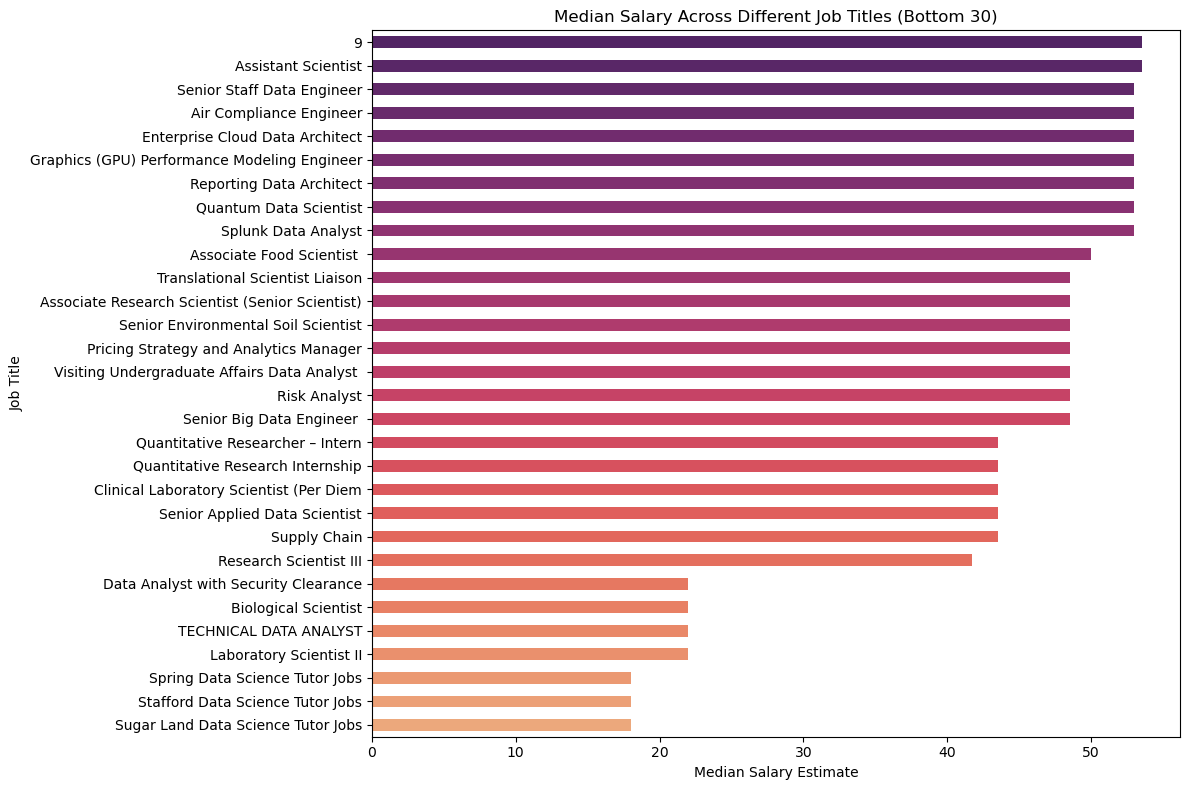

In [52]:
# Get the bottom 30 job titles based on median salary estimate
bottom_30_job_titles = df.groupby('Job Title')['Salary Estimate'].median().nsmallest(30).index

# Filter the DataFrame for the bottom 30 job titles
df_bottom_30 = df[df['Job Title'].isin(bottom_30_job_titles)]

# Sort the DataFrame by median salary estimate within each job title
df_bottom_30_sorted = df_bottom_30.groupby('Job Title')['Salary Estimate'].median().sort_values()

# Define a palette of colors using seaborn (using 'flare' palette)
custom_palette = sns.color_palette('flare', len(df_bottom_30_sorted))

# Plot the bar graph with the custom palette
plt.figure(figsize=(12, 8))
df_bottom_30_sorted.plot(kind='barh', color=custom_palette)
plt.xlabel('Median Salary Estimate')
plt.ylabel('Job Title')
plt.title('Median Salary Across Different Job Titles (Bottom 30)')
plt.tight_layout()
plt.show()

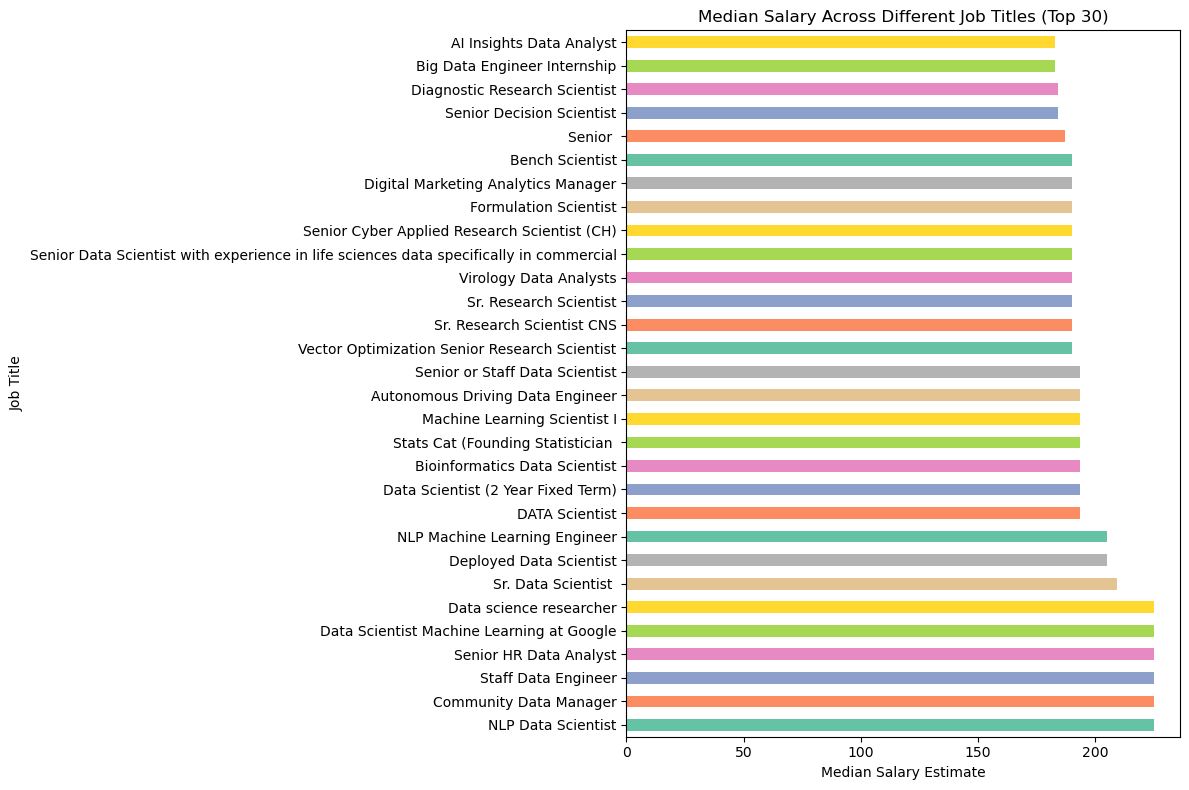

In [53]:
# Get the top 30 job titles based on median salary estimate
top_30_job_titles = df.groupby('Job Title')['Salary Estimate'].median().nlargest(30).index

# Filter the DataFrame for the top 30 job titles
df_top_30 = df[df['Job Title'].isin(top_30_job_titles)]

# Sort the DataFrame by median salary estimate within each job title
df_top_30_sorted = df_top_30.groupby('Job Title')['Salary Estimate'].median().sort_values(ascending=False)

# Define a palette of colors using seaborn (using 'Set2' palette)
custom_palette = sns.color_palette('Set2', len(df_top_30_sorted))

# Plot the bar graph with the custom palette
plt.figure(figsize=(12, 8))
df_top_30_sorted.plot(kind='barh', color=custom_palette)
plt.xlabel('Median Salary Estimate')
plt.ylabel('Job Title')
plt.title('Median Salary Across Different Job Titles (Top 30)')
plt.tight_layout()
plt.show()


Feature Importances:
Job Title: 0.192920647774464
Rating: 0.07216001884889309
Company Name: 0.11666238991369654
Location: 0.34243052097540455
Headquarters: 0.08554611147003253
Size: 0.03652630605553693
Founded: 0.07764905444145744
Type of ownership: 0.027057852415238767
Sector: 0.04904709810527617


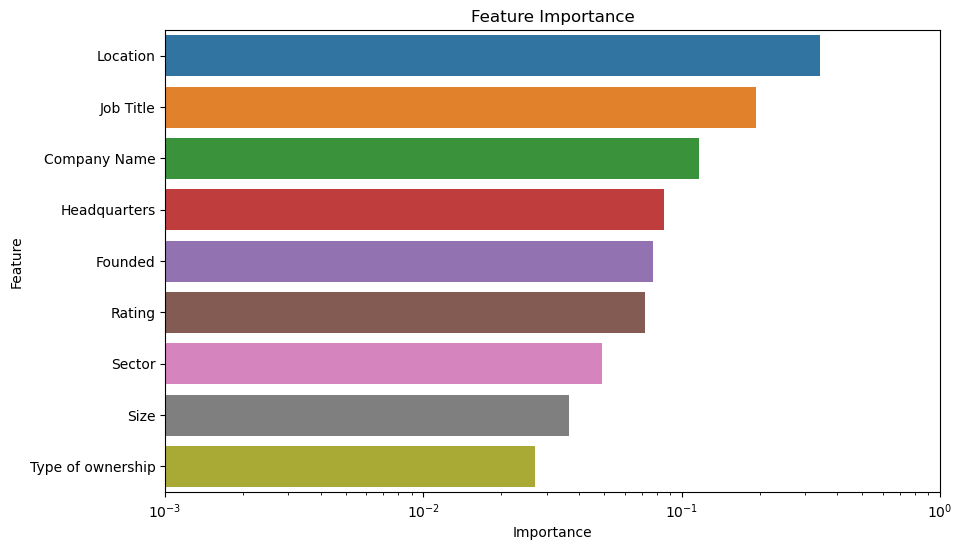

In [48]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Convert categorical features to numeric
categorical_columns = df_imputed.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_imputed[col] = le.fit_transform(df_imputed[col])
    label_encoders[col] = le

# Define features and target
X = df_imputed.drop(columns=['Salary Estimate'])
y = df_imputed['Salary Estimate']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (Random Forest Regressor in this case)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Get the column names from the encoded DataFrame
column_names = list(X.columns)
print("Feature Importances:")
for feature, importance in zip(column_names, feature_importances):
    print(f"{feature}: {importance}")

# Visualize the feature importances
importances = pd.Series(feature_importances, index=column_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlim(1e-3, 1)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()